pip install numpy  
pip install pandas  
pip install openpyxl  
pip install tqdm
pip install ffmpeg  
pip install pydub  
conda install -c conda-forge librosa  
pip install -U praat-parselmouth

In [1]:
import pydub
import pandas as pd
from tqdm import tqdm
import os

pydub.AudioSegment.converter = r"C:/Users/Kinza/anaconda3/envs/pie/Library/bin/ffmpeg.exe" #CHANGE THIS

# Data loading

In [2]:
def get_end_from_start(df_mail):
    end             = df_mail.iloc[1:,:]['start'].copy()
    end[len(end)+1] = -1
    df_mail['end']  = end.values
    return df_mail

def get_start_end_from_file(file):
    #Get start and end times
    df = pd.read_excel(file)
    df = df.rename(columns={'time':'start'}) 
    df['start'] = df['start']*1000 #in ms

    df = df.groupby('mail').apply(get_end_from_start)
    return df

def load_audios(video_folder,startend_file) :
    '''Loads the audios from each interview question.
    Arguments:
        video_folder : str. The name of the folder containing mp4 videos.
        startend_file : str. The name of the file containing the video informations. 
            Must contain columns 'mail' and 'time'.
    Returns a list of audios
    '''
    filenames = tqdm(os.listdir(video_folder))
    df_startend = get_start_end_from_file(startend_file)
    audios = list(map(lambda f : load_audio(video_folder,df_startend,f), filenames))
    return [item for sublist in audios for item in sublist]


In [4]:
from audio_feats_extract import load_audio

video_folder = 'videos/'
df_name = 'test.xlsx'

audios = load_audios(video_folder,df_name)

 33%|███▎      | 1/3 [01:37<03:15, 97.81s/it]

In [ ]:
audios[1].spectral_features

,rms,spec_cent,spec_bw,rolloff,zcr,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,...,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11
mean,0.044871,2839.038942,3142.372696,5024.803844,0.069704,-396.626747,99.945612,14.077295,15.189622,15.137396,...,0.257474,0.193744,0.160091,0.163266,0.138997,0.165495,0.250408,0.344625,0.467093,0.483843
std,0.037229,2605.151269,1319.556400,4997.968679,0.095941,73.999082,62.420127,35.329366,34.547575,25.073616,...,0.308087,0.298261,0.240579,0.262583,0.218006,0.230251,0.301918,0.347450,0.360368,0.324898
min,0.000089,471.888457,1241.525787,234.375000,0.007324,-553.980164,-113.828293,-86.339127,-93.917351,-80.448517,...,0.000176,0.000218,0.000204,0.000123,0.000108,0.000145,0.000114,0.000248,0.000658,0.001484
max,0.352426,12135.280498,6781.699960,16898.437500,0.528809,-151.442795,217.433685,94.427536,122.327248,85.647621,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
audios[1].pauses_features

,pauses
nb,0.150000
mean,0.044444
max,0.100000


In [ ]:
audios[1].prosodic_features

,f0,loudness,psd,f1,f2,f3
mean,238.891360,3.308608,1.229372,490.646284,1561.034270,2480.002046
std,36.593398,1.959595,2.906449,134.672661,519.472293,479.462787
min,73.422109,0.000235,0.000002,115.994638,313.673787,1145.595866
max,317.441288,8.717532,61.080835,1841.381128,3281.484770,4030.474446


In [ ]:
audios[1].audio.export("tes.wav","wav")

<_io.BufferedRandom name='tes.wav'>

In [ ]:
audios[1].email

'anna.gounot@student.isae-supaero.fr'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Use seaborn's default style to make attractive graphs
plt.rcParams['figure.dpi'] = 200 # Show nicely large images in this notebook

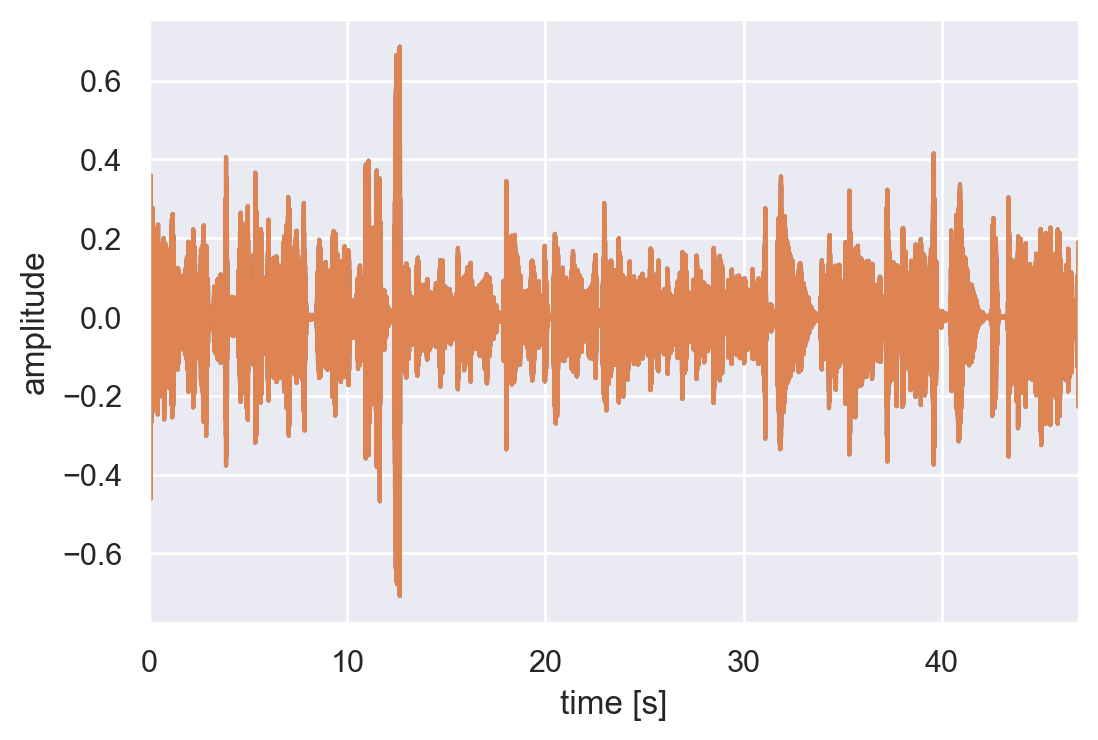

In [ ]:
import parselmouth
snd = parselmouth.Sound("tes.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [ ]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1, color='w')
    #plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

C:\Users\Kinza\AppData\Local\Temp\ipykernel_3696\1668716826.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


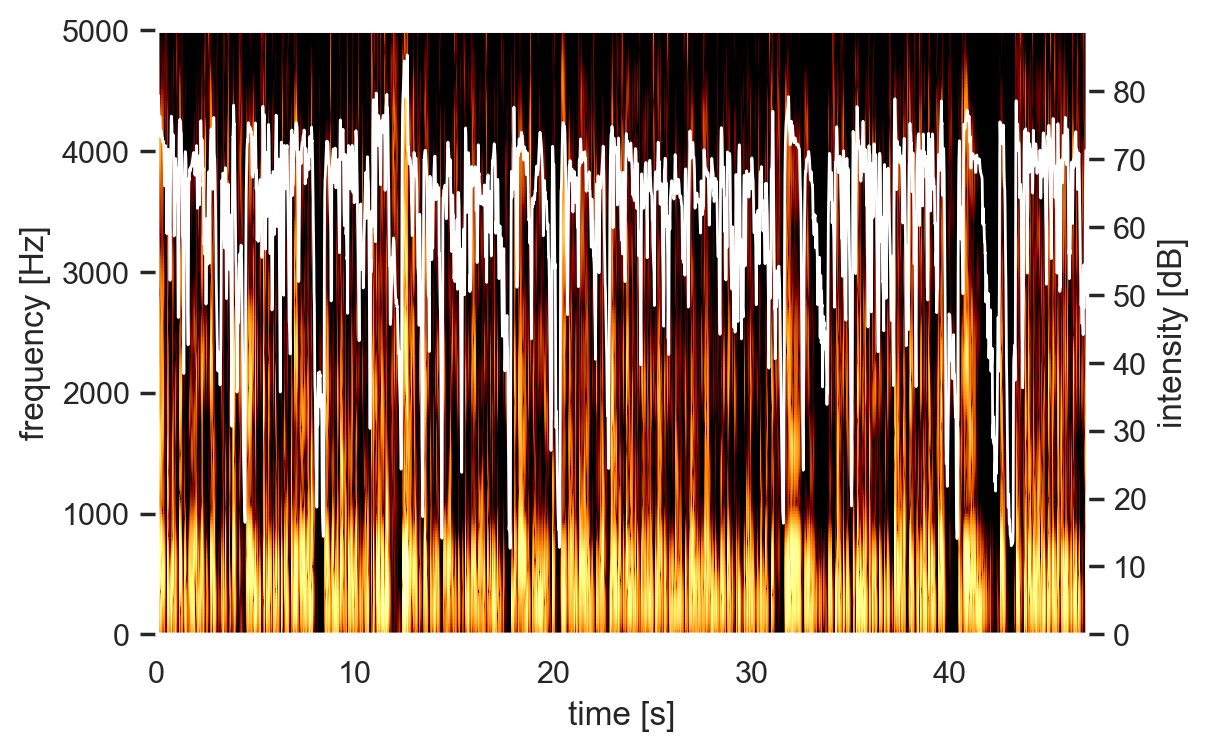

In [ ]:
import numpy as np
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

In [ ]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

C:\Users\Kinza\AppData\Local\Temp\ipykernel_3696\1668716826.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


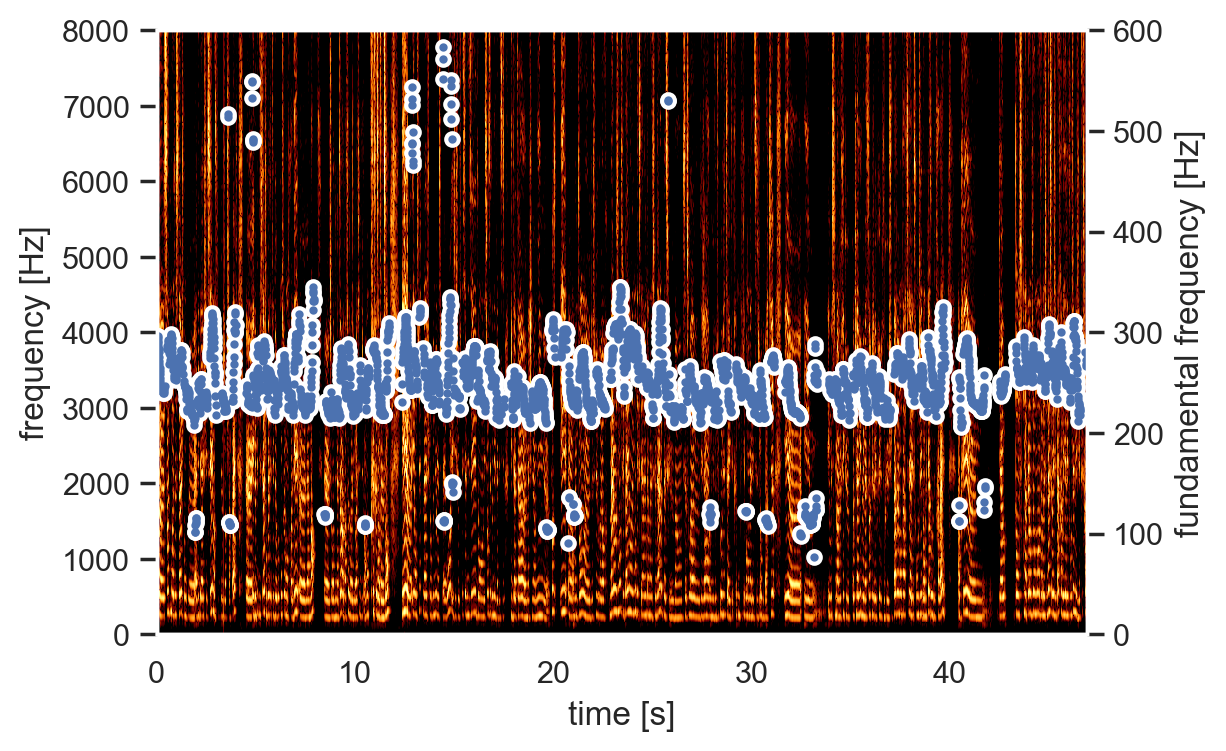

In [14]:
snd = snd.to_filter("pass", "Hann band", 100, 5000, 1)
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

# Load features

In [ ]:
import pandas as pd

all_features = []
for (i,audio) in enumerate(audios):
    features = pd.concat([audio.pauses_features,audio.spectral_features,audio.prosodic_features])
    features['email'] = audio.email
    features['question'] = audio.question

    features['temp'] = features.index
    features = features.pivot_table(index='timestamp', columns='temp', values=features.columns[-3], aggfunc='first')

    all_features = all_features.append(features)

all_features = pd.concat(all_features)

# PCA

In [ ]:
from pca import pca

model = pca(n_components=2)

# Fit transform
features_pca = model.fit_transform(features.drop('classes',axis=1))

print(model.compute_topfeat())

# Scatter first 2 PCs
fig, ax = model.scatter(legend=False)

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=10,legend=False)

import matplotlib.pyplot as plt
plt.scatter(features_pca['PC']['PC1'],features_pca['PC']['PC2'],c=features['classes'])